[0.75, 0.475, 0.2]
[[0.2, 0.5, 0.8], [0.2, 0.35, 0.5, 0.65, 0.8], [0.4, 0.6]]


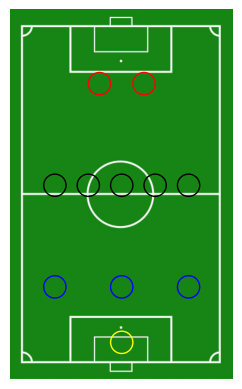

In [84]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 이미지 파일 로드
image_path = 'playground.png'  # 이미지 파일 경로 설정
image = Image.open(image_path)
width, height = image.size

# 이미지 위에 그래픽 그리기
def draw_on_image(image, *args):
    fig, ax = plt.subplots()
    ax.imshow(image)
    
    virtical_relative_positions = []
    horizontal_relative_positions = []
    
    virtical_rp = 0.75
    for _ in range(len(args)):
        virtical_relative_positions.append(round(virtical_rp,5))
        virtical_rp -= 0.55/(len(args)-1)
    # virtical_relative_positions += [0.9]
    
    for nums in args:
        horizontal_rp = 0.2
        horizontal_relative_per_positions = []
        for _ in range(nums):
            horizontal_relative_per_positions.append(round(horizontal_rp,5))
            if nums == 1:
                horizontal_rp += 0.6/(1)
            else:
                horizontal_rp += 0.6/(nums-1)
        if len(horizontal_relative_per_positions) == 1:
            horizontal_relative_per_positions = [0.5]
        if len(horizontal_relative_per_positions) == 2:
            horizontal_relative_per_positions = [0.4, 0.6]
        horizontal_relative_positions.append(horizontal_relative_per_positions)
    
    color_list = ['blue', 'black','red']
    idx = 0
    # 포지션(동그라미) 그리기 - 예시로 몇 개의 포지션을 임의로 추가
    for virtical_pos, horizontal_pos_list in zip(virtical_relative_positions, horizontal_relative_positions):
        circle_y = virtical_pos * height  # 세로 위치 계산
        color = color_list[idx]
        for horizontal_pos in horizontal_pos_list:
            circle = plt.Circle((width * horizontal_pos, circle_y), width * 0.05, color=color, fill=False)  # 가로 중앙, 지정된 세로 위치에 동그라미 그리기
            ax.add_patch(circle)
        idx += 1
            
    keep_circle_y = 0.9 * height        
    keep_circle = plt.Circle((width * 0.5, keep_circle_y), width * 0.05, color='yellow', fill=False)  # 가로 중앙, 지정된 세로 위치에 동그라미 그리기
    ax.add_patch(keep_circle)           
    
    # 축과 레이블 제거
    ax.axis('off')
    
    print(virtical_relative_positions)
    print(horizontal_relative_positions)
    
    return fig

# 이미지 위에 포지션 그리기 및 표시
fig = draw_on_image(image,3,5,2)
plt.show()


In [88]:
d = 0.2
n = 5
relative_positions = []

for i in range(n):
    relative_positions.append(round(d,5))
    d += 0.6/(n-1)
relative_positions

[0.2, 0.35, 0.5, 0.65, 0.8]

In [4]:
a = "123"